# Credit Scoring Model – A Teaching-Oriented Notebook

## 1. Introduction

Credit scoring is a fundamental concept in finance and economics, widely used by commercial banks and financial institutions to assess the likelihood of borrower default. This notebook presents a step-by-step walkthrough for constructing a basic credit scoring model using publicly available data from the [Home Credit Default Risk competition on Kaggle](https://www.kaggle.com/competitions/home-credit-default-risk/).

Designed with **teaching usability** in mind, this project aims to bridge the gap between statistical modeling and real-world lending applications. It is particularly well-suited for **undergraduate and graduate coursework** in credit risk, as well as **onboarding programs for junior credit analysts** in financial institutions. The notebook integrates both **modeling techniques** and **regulatory considerations**, offering a holistic view of credit risk evaluation.

Key highlights of this teaching-oriented project include:

1. **Regulatory context**: Introduction to model restrictions commonly seen in credit risk regulation, emphasizing transparency and auditability.
2. **Logistic regression**: Chosen for its simplicity and interpretability, making it ideal for instruction in courses with a finance or economics focus.
3. **Model performance analysis**: Emphasis on confusion matrix and recall metrics to introduce practical evaluation methods beyond overall accuracy.
4. **Extension opportunities**: Discussion on how to improve model performance using more advanced techniques, while maintaining a clear teaching framework.

This project was inspired by similar exercises from my Master’s coursework, where we built a recall-optimized credit scoring model for individual credit card users. The structure presented here can be naturally extended to institutional-level probability of default (PD) prediction frameworks. As such, the notebook is highly adaptable for use by **economics and finance instructors**, as well as by **small-to-medium-sized financial institutions** looking to train junior analysts in credit risk modeling.

---


## 2. Dataset and Teaching Considerations

This project uses data from the [Home Credit Default Risk competition on Kaggle](https://www.kaggle.com/competitions/home-credit-default-risk/).

**Dataset citation:**
Sergey Kharitonov. (2018). *Home Credit Default Risk*. Kaggle. https://www.kaggle.com/competitions/home-credit-default-risk

**Home Credit** is a global consumer finance provider that offers personal loans to retail clients. The dataset reflects real-world loan applications and borrower outcomes, making it highly suitable for credit risk education and modeling.

Working with real-world financial data introduces challenges not typically present in academic datasets—such as missing values, data imbalance, and regulatory modeling constraints. These challenges make this dataset especially valuable for instructional use, allowing students to engage with realistic data preprocessing and risk modeling tasks.


### 2.1 Dataset Overview

The dataset includes hundreds of variables covering loan applicants' demographics, employment status, income, credit history, and more. The target variable, `TARGET`, is binary:
- `1` indicates a loan that ultimately defaulted;  
- `0` indicates successful repayment.

The dataset consists of **307,511 rows and 155 columns**, representing individual loan applications and their associated borrower characteristics. This scale offers students exposure to realistic data volume, preparing them for practical modeling environments commonly encountered in the financial industry.  
**The modeling goal** is to predict the probability of default based on selected input features.


### 2.2 Data Preprocessing for Teaching

As a teaching-oriented notebook, the data pipeline has been intentionally simplified for educational clarity. Only the main application table is used, excluding auxiliary tables to avoid overwhelming new learners. Key preprocessing steps include:

- Filling missing values using median imputation;
- Filtering for variables with acceptable levels of missingness;
- Aligning the data structure with typical regulatory model design—where variables must be auditable and interpretable.

This setup mimics the constraints of modeling in financial institutions, while remaining accessible to students with a data analytics or applied statistics background.

### 2.3 Feature Selection and Explanation

Feature selection in this notebook reflects a balance between regulatory realism and instructional clarity. The process consists of two stages:

#### Step 1: Preliminary Filtering

We first applied two key filters to reduce the candidate variable set:

- **Regulatory considerations** – Only variables that are auditable, interpretable, and aligned with compliance standards in financial institutions were retained;
- **Data quality filtering** – Variables with excessive missing values or unreliable distributional properties were excluded to avoid potential modeling bias.

This step mirrors how variable selection is handled in regulated credit risk modeling environments, where explainability and data integrity are essential.

#### Step 2: Top 30 Selection by Coefficient Magnitude

From the pre-filtered set of variables, we fit a logistic regression model using all remaining features. We then selected the **top 30 features based on the absolute magnitude of their regression coefficients**, ensuring that only statistically influential variables were retained in the final model.

This method introduces students to **coefficient-based screening**, a commonly used technique in applied modeling, while keeping the feature set manageable for educational settings.

Examples of selected features include:

- `AMT_INCOME_TOTAL`: a key predictor of repayment capacity;
- `DAYS_EMPLOYED`: often interpreted as a proxy for income stability.

The final variable set is small enough to support classroom discussion, while being realistic enough to reflect actual credit scoring practices.
To support reproducibility, specific feature filtering steps are included in the appendix code cells for instructional reference.


### 2.4 Teaching Note: Class Imbalance

A notable characteristic of the dataset is the **class imbalance** in the target variable. Only about **8% of the 307,511 loan applicants** in the dataset ultimately defaulted (i.e., `TARGET = 1`), while the remaining 92% repaid successfully.

This presents a valuable opportunity for teaching students about imbalanced classification problems—a common challenge in credit risk modeling. A naïve model that predicts all applicants as "non-default" would achieve high accuracy (~92%) but completely fail in identifying actual defaulters, which is unacceptable in lending decisions.

To address this, the notebook uses logistic regression with `class_weight='balanced'` to reweight the minority class during training. This allows for a more informative discussion on **recall vs. precision tradeoffs**, cost of misclassification, and how regulatory models often prioritize minimizing false negatives (missed defaults) over false positives.

Instructors may also engage students in critical reflection: *"Why is high accuracy misleading here?"* or *"What metric matters more when approving a loan?"*


---

## 3. Building and Interpreting the Credit Scoring Model

### 3.1 Logistic Regression: Why It Works for Credit Risk

Logistic regression is a **supervised machine learning algorithm** used for binary classification tasks. It is particularly well-suited for predicting loan default, where the response variable is binary (`default` or `no default`). In this context, it serves as both a practical baseline model and a teaching-friendly introduction to probabilistic classification.

#### Classification and Probability Estimation

In credit scoring, the goal is to predict the probability that a borrower will default. Logistic regression transforms a linear combination of input features into a probability using the **sigmoid (logistic) function**:

$$
P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n)}}
$$

This function maps any real-valued number to the interval (0, 1), which makes it interpretable as a probability.

#### Model Training via Maximum Likelihood

The model parameters $\beta$ are estimated using **Maximum Likelihood Estimation (MLE)**. Instead of minimizing squared error like in linear regression, logistic regression seeks to maximize the likelihood that the model correctly predicts the observed outcomes. The **log-likelihood loss function** is written as:

$$
\mathcal{L}(\beta) = \sum_{i=1}^n \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]
$$

where $p_i = P(Y_i = 1 \mid X_i)$.

This loss function is optimized using algorithms such as **gradient descent** to obtain the best-fitting parameters.

#### Threshold-Based Classification

Once the model outputs probabilities, we apply a **decision threshold** (typically 0.5) to assign class labels:

- If $P(Y=1 \mid X) > 0.5$, classify as default (`1`);
- If $P(Y=1 \mid X) \leq 0.5$, classify as non-default (`0`).

This threshold can be adjusted based on the cost of false positives and false negatives, which is especially important in credit risk modeling.

#### Why Logistic Regression is Useful in Credit Scoring

- 1. **Fast and scalable**: Can handle large datasets efficiently using convex optimization;
- 2. **Interpretable**: Each coefficient represents the log-odds change in the outcome given a one-unit change in the feature;
- 3. **Regulatory-friendly**: Widely accepted in risk modeling and audit settings, especially under Basel II/III frameworks;
- 4. **Instructional clarity**: Suitable for teaching due to its linearity and well-defined assumptions.

#### Limitations in Real-World Credit Risk

- 1. **Linearity**: It assumes a linear relationship between input features and the log-odds of the outcome, which may not hold in complex borrower behavior;
- 2. **Sensitive to class imbalance**: When default rates are low (as in our dataset), the model can be biased toward predicting the majority class. Therefore, **data preprocessing steps such as class rebalancing are essential**.

In our notebook, we use logistic regression as a starting point, emphasizing its transparency and pedagogical value before discussing model extensions in later sections.


### 3.2 Model Training and Evaluation Metrics

#### Model Fitting — Logistic Regression

To simulate a real-world modeling process, we split the dataset into a **training set** and a **validation set**. The training set is used to fit the model, while the validation set is used to assess model performance and avoid overfitting to test data.

We used logistic regression with maximum 3000 iterations and set `class_weight='balanced'` to account for the class imbalance (~8% default rate). This ensures that minority class observations (defaults) are properly weighted during training.

Details on data preprocessing and parameter settings can be found in the Appendix.



#### Evaluation Metrics

After training the model, we evaluate its performance using standard classification metrics derived from the **confusion matrix**:

- **True Positives (TP)**: Default cases correctly predicted as default  
- **False Positives (FP)**: Non-defaults incorrectly predicted as default  
- **True Negatives (TN)**: Non-defaults correctly predicted as non-default  
- **False Negatives (FN)**: Defaults incorrectly predicted as non-default  

An example confusion matrix (based on validation data) is shown below:

|                          | Predicted: Default (1) | Predicted: Non-Default (0) |
|--------------------------|------------------------|-----------------------------|
| **Actual: Default (1)**     |       TP               | FN                          |
| **Actual: Non-Default (0)** |       FP               | TN                          |

*Note: These values are illustrative; actual results depend on dataset splits and random seed.*

From the matrix above, we compute:

- **Accuracy**: (TP + TN) / Total  
- **Precision**: TP / (TP + FP)  
- **Recall (Sensitivity)**: TP / (TP + FN)  
- **F1 Score**: Harmonic mean of precision and recall

These metrics are widely used in both academic and industry settings to evaluate classification performance. In particular, **recall ratio** is a critical metric in credit scoring, where failing to identify true defaulters can result in significant financial risk.



#### Teaching Reflection: Beyond Accuracy

In imbalanced datasets such as this one, **accuracy can be misleading**. A model that predicts every borrower as "non-default" would still achieve over 90% accuracy but fail to identify any defaulters.

This makes **recall** a more meaningful metric for credit risk modeling, especially from a regulatory and financial loss prevention perspective.

**Teaching prompt:**

- Why is accuracy not sufficient in credit scoring?  
- Which matters more for a bank: lending to a defaulter (false negative) or rejecting a safe borrower (false positive)?



This section introduces students to both the technical metrics and the real-world interpretation of model outputs, laying the groundwork for threshold adjustment and business-aligned decision-making in the next section.


### 3.3 Model Output Visualization and model performance analysis
After training the logistic regression model, we explored its probability output to better understand how classification performance varies with different thresholds. Rather than using the default cutoff of 0.5, we conducted a threshold experiment to evaluate how precision and recall change across various decision boundaries.

The results are summarized below:

| Threshold | Precision | Recall |
|-----------|-----------|--------|
| 0.2       | 0.09      | 0.98   |
| 0.3       | 0.10      | 0.92   |
| **0.4**   | **0.13**  | **0.82** | 
| 0.5       | 0.16      | 0.67   |
| 0.7       | 0.25      | 0.32   |

Although overall model performance remains modest, this exercise demonstrates the core concept of **precision–recall trade-off**. For example:

- A threshold of **0.2** maximizes recall (98%) but results in extremely low precision, meaning the model flags almost everyone as default.
- A threshold of **0.7** improves precision (25%) but fails to catch most defaulters (recall 32%).
- A threshold of **0.4**, while not optimal, offers a reasonable compromise with 82% recall and slightly improved precision.

This exploratory process mirrors real-world credit risk modeling, where thresholds are often selected based not on accuracy alone, but on **business preferences**, **risk appetite**, and **misclassification costs**.


#### Teaching Reflection

This section is particularly useful for classroom instruction because:

- It helps students visualize how classification models behave beyond a single threshold.
- It reinforces the idea that "optimal performance" depends on context — in our case, avoiding missed defaulters may be more critical than minimizing false positives.
- It opens space for discussion: *What if we used this model in pre-screening? Or in final approval?*

Instructors may also use this as an opportunity to simulate business decision-making, allowing students to justify different thresholds under varying regulatory or operational goals.

#### Comparing Thresholds: 0.5 vs 0.4

By default, most classification models—including `sklearn`'s logistic regression—use a threshold of **0.5** to determine class labels. However, in the context of credit risk modeling, such a default may not align with business goals or risk management priorities.

To explore this, we compared model performance using both the default threshold (0.5) and a lower threshold (0.4) identified during experimentation.

| Threshold | Precision | Recall | F1 Score |
|-----------|-----------|--------|----------|
| 0.5       | 0.16      | 0.67   | 0.25     |
| 0.4       | 0.13      | 0.82   | 0.22     |

While the F1 score at threshold 0.4 is slightly lower than that at 0.5, the **recall improves substantially**—from 67% to 82%. This means the model is able to capture significantly more defaulters, albeit at the cost of introducing more false positives.

From a business and regulatory perspective, **missing defaulters (false negatives)** often carries higher risk than wrongly rejecting some non-defaulters (false positives). Therefore, **a modest decline in F1 score may be acceptable if it comes with a substantial gain in recall**.

This example illustrates an important concept in credit risk modeling:  
> **"The best threshold is not always the one that maximizes F1 score—it's the one that best matches the institution's risk appetite."**

## 4. Conclusion and Pedagogical Takeaways

This project demonstrates how logistic regression can be applied to real-world financial data for binary classification—in this case, predicting individual credit default. The notebook walks through the full modeling pipeline, including regulatory-conscious data preprocessing, logistic regression fundamentals, model training, validation, evaluation metrics with financial rationale, and threshold experimentation.

Although the model is simplified, it effectively bridges academic concepts and real-world modeling practices, making it highly suitable for:

- Credit risk instruction at the undergraduate or graduate level;
- Training programs for junior credit analysts at financial institutions.

Several modeling choices and assumptions are worth noting:

1. **Data simplification**: To focus on core teaching objectives, only top features from the main table were used. Interested learners may explore additional feature engineering using auxiliary tables from the public Kaggle dataset.
2. **Model assumptions**: Logistic regression captures only linear relationships and may underperform in highly nonlinear settings.
3. **Performance limitations**: The model's precision is low despite strong recall, highlighting common trade-offs in imbalanced classification.

This notebook also offers potential extensions:

- It can be adapted to model **institution-level probability of default (PD)** using aggregated features;
- It can be extended with more advanced machine learning algorithms for better performance;
- Score calibration, cost-sensitive classification, and business rule integration can be introduced to simulate production-level decisions.

As a teaching tool, this project can support:

- **Conceptual understanding** of probability of default and classification metrics;
- **Group discussions** around recall vs. precision and risk decision-making;
- **Assignment extensions** involving threshold tuning, feature expansion, or model comparison.

Overall, this notebook offers a replicable, interpretable, and practical teaching case that illustrates the trade-offs and design decisions underlying real-world credit risk modeling.Instructors can use each section as an assignment module。


## Appendix A. Python Code and Implementation Notes

This appendix presents selected code snippets that support the modeling and evaluation steps described in Sections 2 and 3. Code cells are grouped by functionality and linked to their corresponding main text sections (e.g., Section 2.3.1, 3.2.2, etc.). Instructors may use each block independently as classroom tasks or notebook exercises.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, average_precision_score
)



In [2]:
##This data is from my local data_path, user can change it to ther own data path, data is from Kaggle
DATA_PATH = r'C:\Users\74596\Kaggle-home-credit-default-risk\home-credit-default-risk'
app_train = pd.read_csv(f'{DATA_PATH}\\application_train.csv')

desc = pd.read_csv(f'{DATA_PATH}\\HomeCredit_columns_description.csv', encoding='latin1')

###A.1. Section 2.1 Dataset Overview

In [3]:
### read the factor description
desc_filtered = desc[
    desc['Table'].isin(['application_{train|test}.csv'])
]
desc_filtered

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


### A.2. Section 2.2 Data Preprocessing

In [4]:
###Clean data without TARGET
app_train = app_train[app_train['TARGET'].notnull()].copy()

### A.3. Section 2.3 Step1: Feature Selection -- Regulatory considerations and Data quality filtering
### Remove prohibited factors under U.S. fair lending laws
The following variables have been excluded from all stages of feature engineering, model training, and evaluation due to regulatory restrictions under U.S. fair lending laws (e.g., ECOA and FCRA):

- CODE_GENDER
- DAYS_BIRTH
- NAME_FAMILY_STATUS
- CNT_CHILDREN
- NAME_INCOME_TYPE
- FLAG_OWN_CAR
- FLAG_OWN_REALTY

These variables, though predictive, are **not permissible** in any credit scoring model intended for real-world deployment in the U.S. financial industry.

A proxy variable is a variable that, while not explicitly protected or prohibited, correlates strongly with one or more protected attributes (e.g., gender, race, age, marital status). In credit modeling, such variables can lead to indirect discrimination or disparate impact, even if they were not intended to do so.

In [5]:
prohibited_factors = [
    'CODE_GENDER', #Direct gender discrimination risk (prohibited under ECOA)
    'DAYS_BIRTH', #Age-based discrimination risk (restricted use under ECOA)
    'NAME_FAMILY_STATUS', #Marital status, prohibited under ECOA
    'CNT_CHILDREN', #Proxy variable, may imply marital/family structure
    'NAME_INCOME_TYPE', #Includes groups under special legal protection (e.g., Servicemen, Pensioners)
    'FLAG_OWN_CAR', #Proxy for wealth/asset ownership, may introduce disparate impact
    'FLAG_OWN_REALTY'#Proxy for wealth/asset ownership, may introduce disparate impact
]

In [6]:
app_train[prohibited_factors].head()

,CODE_GENDER,DAYS_BIRTH,NAME_FAMILY_STATUS,CNT_CHILDREN,NAME_INCOME_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,M,-9461,Single / not married,0,Working,N,Y
1,F,-16765,Married,0,State servant,N,N
2,M,-19046,Single / not married,0,Working,Y,Y
3,F,-19005,Civil marriage,0,Working,N,Y
4,M,-19932,Single / not married,0,Working,N,Y


In [7]:
app_train = app_train.drop(columns=prohibited_factors)

###  Feature Selection -- Data quality filtering

Variables with excessive missing values or unreliable distributional properties were excluded to avoid potential modeling bias.

In [8]:
### Data preparation 
### Remove High missing ratio data
missing_ratio = app_train.isnull().mean().sort_values(ascending=False)

high_missing_cols = missing_ratio[missing_ratio > 0.4].index.tolist()

app_train = app_train.drop(columns=high_missing_cols)

print(f"Removed {len(high_missing_cols)} columns with >40% missing.")

Removed 49 columns with >40% missing.


In [9]:
categorical_cols = app_train.select_dtypes(include='object').columns.tolist()
numerical_cols = app_train.select_dtypes(include=['int', 'float']).drop(columns=['TARGET']).columns.tolist()
app_train = pd.get_dummies(app_train, columns=categorical_cols, drop_first=True)

In [10]:
# y is the binary target variable:
# 1 = applicant defaulted; 0 = applicant repaid normally
y = app_train['TARGET']

# X includes all preprocessed features after:
# - Removing the target column
# - Removing prohibited variables (e.g., gender, marital status)
# - Handling missing values
# - Encoding categorical variables (e.g., via One-Hot)
X = app_train.drop(columns=['TARGET'])

print(f"X shape: {X.shape}")
print("y distribution:")
print(y.value_counts(normalize=True))

X shape: (307511, 154)
y distribution:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [11]:
# Training data (X and y) is splited into:
# - Training subset (70%) used to fit the model and select features
# - Validation subset (30%) used to evaluate performance later
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [12]:
vt = VarianceThreshold(threshold=0.01)
vt.fit(X_train)

X_train_vt = X_train.loc[:, vt.get_support()]
X_val_vt = X_val[X_train_vt.columns]  # Ensure aligned columns

##Fill NaN
X_train_vt = X_train_vt.fillna(X_train_vt.median())
X_val_vt = X_val_vt.fillna(X_train_vt.median())

print(f"Low-variance features removed. Remaining features: {X_train_vt.shape[1]}")

Low-variance features removed. Remaining features: 83


In [13]:
# Standardization is required so that coefficient magnitudes
# are comparable across variables with different scales
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train_vt), columns=X_train_vt.columns)
X_val_std = pd.DataFrame(scaler.transform(X_val_vt), columns=X_val_vt.columns)

In [14]:
model = LogisticRegression(max_iter=3000,class_weight='balanced')
model.fit(X_train_std, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [15]:
coef_df = pd.DataFrame({
    'Feature': X_train_std.columns,
    'Coefficient': model.coef_[0]
})
coef_df['Abs_Coeff'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coeff', ascending=False)

# Select top features for final modeling
top_features = coef_df.head(30)['Feature'].tolist()

# Prepare final feature matrix
X_train_top = X_train_std[top_features]
X_val_top = X_val_std[top_features]

### A.4. Section 3.2 Model Training and Evaluation Metrics -- Logistic Regression Model Fitting 

In [16]:

# Prepare final feature matrix
X_train_top = X_train_std[top_features]
X_val_top = X_val_std[top_features]

In [17]:
model_final = LogisticRegression(max_iter=3000, class_weight='balanced').fit(X_train_top, y_train)
model_final

LogisticRegression(class_weight='balanced', max_iter=3000)

#### Model Validation with defaulted threshold (threshold = 0.5)

In [18]:
# Predict on validation set
y_pred = model_final.predict(X_val_top)
y_prob = model_final.predict_proba(X_val_top)[:, 1]

In [19]:
# AUC score
auc_score = roc_auc_score(y_val, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

AUC-ROC Score: 0.7363


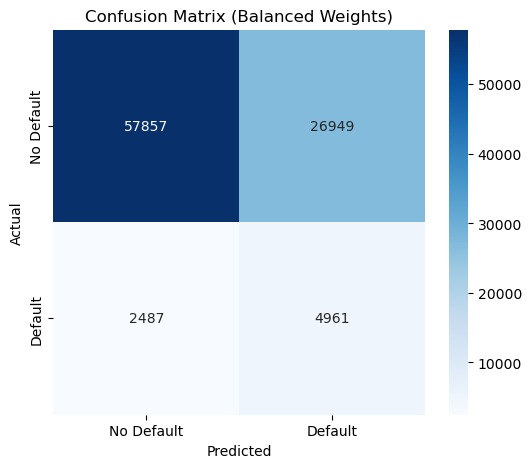

In [20]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Weights)')
plt.show()

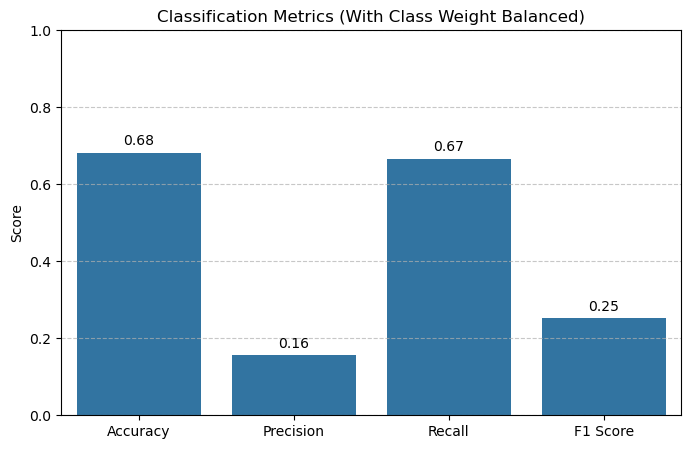

In [21]:
# Classification metrics
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)

metrics = {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1)
plt.title('Classification Metrics (With Class Weight Balanced)')
plt.ylabel('Score')
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

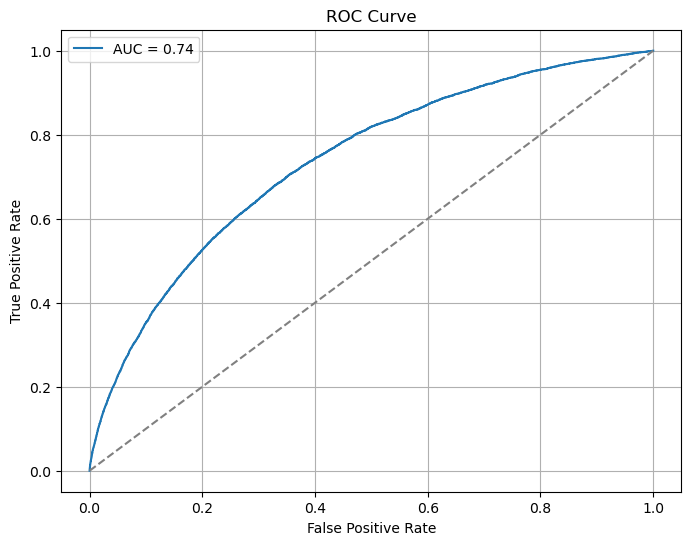

In [22]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

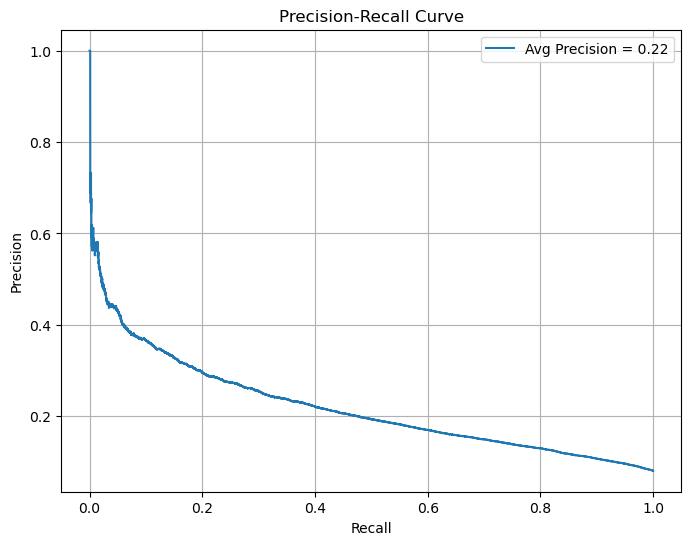

In [23]:
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)
avg_precision = average_precision_score(y_val, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

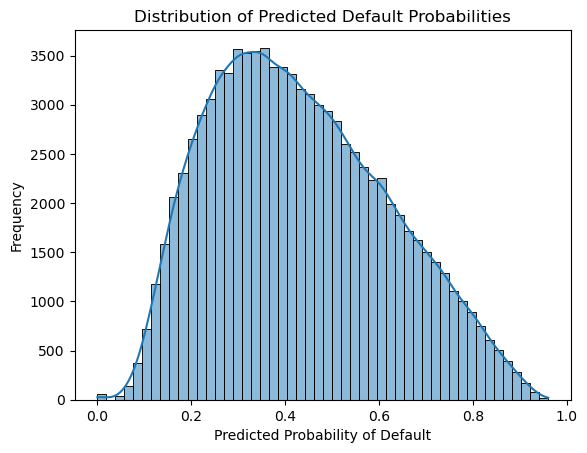

In [24]:
sns.histplot(y_prob, bins=50, kde=True)
plt.title('Distribution of Predicted Default Probabilities')
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Frequency')
plt.show()

### A.5. Section 3.3 Model Output Visualization and model performance analysis
### Model Validation with updated threshold (threshold = 0.4)

In [25]:
from sklearn.metrics import precision_score, recall_score

for t in [0.2, 0.3, 0.4, 0.5, 0.7]:
    y_pred_threshold = (model_final.predict_proba(X_val_top)[:, 1] >= t).astype(int)
    print(f"Threshold {t} → Precision: {precision_score(y_val, y_pred_threshold):.2f}, Recall: {recall_score(y_val, y_pred_threshold):.2f}")

Threshold 0.2 → Precision: 0.09, Recall: 0.98
Threshold 0.3 → Precision: 0.10, Recall: 0.92
Threshold 0.4 → Precision: 0.13, Recall: 0.82
Threshold 0.5 → Precision: 0.16, Recall: 0.67
Threshold 0.7 → Precision: 0.25, Recall: 0.31


In [26]:
y_pred_04 = (model_final.predict_proba(X_val_top)[:, 1] >= 0.4).astype(int)
y_pred_05 = (model_final.predict_proba(X_val_top)[:, 1] >= 0.5).astype(int)


print("Threshold = 0.4")
print(classification_report(y_val, y_pred_04))

print("\nThreshold = 0.5")
print(classification_report(y_val, y_pred_05))

Threshold = 0.4
              precision    recall  f1-score   support

           0       0.97      0.50      0.66     84806
           1       0.13      0.82      0.22      7448

    accuracy                           0.53     92254
   macro avg       0.55      0.66      0.44     92254
weighted avg       0.90      0.53      0.63     92254


Threshold = 0.5
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84806
           1       0.16      0.67      0.25      7448

    accuracy                           0.68     92254
   macro avg       0.56      0.67      0.52     92254
weighted avg       0.89      0.68      0.75     92254

